In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from matplotlib.pylab import rcParams
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator as GLMH20
from h2o.grid.grid_search import H2OGridSearch
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import utils
import pygal
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats

*******************************************************************************************************************************************

Projet DU

OUASS Sofian

BOUCHEGOURA Zakaria

*******************************************************************************************************************************************

In [2]:
base_lieux=pd.read_csv('lieux-2020.csv',sep=";")
base_l=base_lieux
base_caracteristiques=pd.read_csv('caracteristiques-2020.csv',sep=";")
base_c=base_caracteristiques
base_vehicules=pd.read_csv('vehicules-2020.csv',sep=";")
base_v=base_vehicules
base_usagers=pd.read_csv('usagers-2020.csv',sep=";")
base_u=base_usagers
base_charge=pd.read_csv('PriseEnCharge-2020.csv',sep=";")

In [3]:
base_l.shape # il y a des doublons :)

(47773, 18)

In [4]:
utils.cleaner_Num_Acc(base_l)
utils.cleaner_circ(base_l)
utils.cleaner_plan(base_l)
utils.cleaner_prof(base_l)
utils.cleaner_situ(base_l)
utils.cleaner_vosp(base_l)
utils.cleaner_surf(base_l)
utils.cleaner_nbv(base_l)
utils.cleaner_colonne(base_l,'pr1')
utils.cleaner_vma(base_l)
utils.cleaner_colonne(base_c,'lum')
utils.cleaner_colonne(base_c,'int')
utils.cleaner_Num_Acc(base_c)
utils.cleaner_vit(base_v)
utils.cleaner_PEC(base_charge)

In [5]:
print(base_l.shape,len(base_l.Num_Acc.value_counts()))
print(base_c.shape,len(base_c.Num_Acc.value_counts()))
print(base_u.shape,len(base_u.Num_Acc.value_counts()))
print(base_v.shape,len(base_v.Num_Acc.value_counts()))

(47744, 18) 47744
(47744, 15) 47744
(105295, 15) 47744
(81066, 12) 47744


Ma base est prête pour être merger, le nombre de valeur unique pour la colonne Num_Acc est le même.

*******************************************************************************************************************************************

Une Analyse exploratrice Différente :) partie (1/2)

Lors de mes vérifications avant de réaliser le merge je me posais des questions comme,
le nombre unique de voitures à la base usager doit être égal au nombre de voiture unique dont la base véhicule

In [6]:
usg=pd.DataFrame(base_u.id_vehicule)
veh=pd.DataFrame(base_v.id_vehicule)

In [7]:
print(len(veh.value_counts()),len(usg.value_counts()))

81066 79167


In [8]:
id_u_v= base_v.merge(base_u, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
pd.set_option('display.max_columns', None)
id_u_v

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,vit,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,_merge
49,"202 000 000 024,00",154 742 231,Z01,1,7,0,2,1,2,0,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
65,"202 000 000 032,00",154 742 217,Z01,0,2,0,2,7,16,0,NaN,54.288713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
86,"202 000 000 042,00",154 742 201,A01,3,7,0,2,0,0,0,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
149,"202 000 000 069,00",154 742 156,A01,0,7,12,2,3,1,1,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
230,"202 000 000 104,00",154 742 097,B01,2,7,0,2,0,5,1,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107065,"202 000 047 691,00",154 658 450,A01,2,7,0,2,1,2,0,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
107113,"202 000 047 708,00",154 658 412,D01,2,10,0,2,1,1,0,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
107152,"202 000 047 725,00",154 658 385,Z01,1,7,0,2,1,15,1,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
107172,"202 000 047 736,00",154 658 367,A01,0,10,0,2,1,2,0,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


On trouve 1889 voitures dans t'on ne connaît pas le propriétaire,
1-il se peut que la voiture soit juste stationnée sans que le propriétaire ne soit dedans
2-il se peut que la personne ait pris la fuite juste aprés l'accident.

Ci-dessous il y a un example

In [9]:
base_v.loc[base_v['Num_Acc']=="202 000 000 042,00"]

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,vit
68,"202 000 000 042,00",154 742 201,A01,3,7,0,2,0,0,0,NaN,50.0
69,"202 000 000 042,00",154 742 200,B01,3,33,0,2,8,3,1,NaN,53.0


In [10]:
base_u.loc[base_u['Num_Acc']=="202 000 000 042,00"]

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
84,"202 000 000 042,00",154 742 200,B01,1,1,4,1,1983.0,9,2,6,-1,-1,-1,-1


Je cite que je prefre faire un merge base par base, et utiliser l'option inner.

Les noms de variables non significatives est a usage temporaire comme "inner_merged"

In [11]:
inner_merged_total = pd.merge(base_u, base_v, on=["Num_Acc","id_vehicule","num_veh"],how="inner")

In [12]:
inner_merged_total1 = pd.merge(inner_merged_total, base_l, on=["Num_Acc"], how="inner")

In [13]:
inner_merged_total2 = pd.merge(inner_merged_total1, base_c, on=["Num_Acc"], how="inner")

In [14]:
inner_merged_total2.Num_Acc.value_counts(dropna=False)

202 000 006 593,00    35
202 000 001 044,00    31
202 000 029 768,00    24
202 000 014 993,00    23
202 000 020 457,00    21
                      ..
202 000 013 329,00     1
202 000 034 936,00     1
202 000 034 938,00     1
202 000 034 939,00     1
202 000 035 994,00     1
Name: Num_Acc, Length: 47744, dtype: int64

In [15]:
bases=inner_merged_total2.copy()

Je tombe sur un total de nombre d'accident égale à 47744, aucune valeur n'a été rajouter

*******************************************************************************************************************************************

Une Analyse exploratrice Différente :) partie (2/2)


In [16]:
print(len(bases.loc[bases['catu']==1].Num_Acc.value_counts()),len(bases.Num_Acc.value_counts()))

46921 47744


Le nombre d'accidents où il y a des usagers inclut mais pas de conducteur n'est pas le même, ce n'est pas normal, sauf si un piéton a cassé une voiture..., on va explorer encore plus la suite est encore plus paradoxale

In [17]:
# a est la base de donnée qui contient les accident ou il y a le conducteur
a=pd.DataFrame(base_u.loc[base_u.catu==1].Num_Acc.value_counts().index,columns=['Num_Acc'])

In [18]:
# b c'est les accidents j'ai utilisé la base lieux car la valeur de l'accident est unique
b=pd.DataFrame(base_l.Num_Acc.value_counts().index,columns=['Num_Acc'])
b

,Num_Acc
0,"202 000 000 001,00"
1,"202 000 031 838,00"
2,"202 000 031 829,00"
3,"202 000 031 830,00"
4,"202 000 031 831,00"
...,...
47739,"202 000 015 924,00"
47740,"202 000 015 925,00"
47741,"202 000 015 926,00"
47742,"202 000 015 927,00"


In [19]:
# c c'est les accident qui n'inclut aucun conducteur mais il y a une voitres et des passager !!! , le total est 823 accidents...
Acc_sans_Con = inner_merged_total2.merge(a, how = 'outer' ,indicator=True, on=['Num_Acc'] ).loc[lambda x : x['_merge']=='left_only'].drop_duplicates(subset='Num_Acc', keep='first',inplace=False)
Acc_sans_Con

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,occutc,vit,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,_merge
43,"202 000 000 021,00",154 742 235,Z01,10,3,3,2,1943.0,5,8,8,-1,3,3,1,3,99,0,1,0,26,0,NaN,54.288713,4,NaN,0,NaN,2,2.0,0,1,0,0,1,NaN,-1,1,0,1,50.0,7,3,2020,15:15,1,22,22113,2,9,8,6,FORLAC'H (RUE DU),"48,732507","-3,453963",left_only
467,"202 000 000 209,00",154 741 895,Z01,10,3,4,2,1996.0,5,0,-1,-1,4,3,1,1,7,0,1,0,1,0,NaN,54.000000,4,NaN,0,NaN,2,4.0,0,1,0,0,1,NaN,-1,1,0,1,50.0,20,9,2020,01:50,5,75,75118,2,2,1,6,RUE MARX DORMOY,"48,890223","2,359918",left_only
726,"202 000 000 324,00",154 741 700,Z01,10,3,4,2,1934.0,5,0,-1,-1,3,3,1,1,7,0,1,1,15,0,NaN,47.000000,4,NaN,0,NaN,1,2.0,0,1,0,0,1,NaN,-1,1,0,1,50.0,24,6,2020,10:00,1,75,75116,2,3,1,6,RUE D AUTEUIL,"48,848046","2,263656",left_only
755,"202 000 000 340,00",154 741 677,A01,10,3,3,1,1995.0,0,8,8,-1,3,0,1,1,10,0,1,1,1,0,NaN,51.000000,4,GRANDS PECHERS (RUE DES),0,NaN,1,1.0,0,1,0,0,1,NaN,-1,1,0,1,50.0,24,6,2020,12:20,1,93,93048,2,2,1,6,R DES GRANDS PECHERS / R LENAIN DE TILLEMONT,"48,85846","2,46246",left_only
769,"202 000 000 346,00",154 741 666,A01,2,2,4,1,2000.0,5,1,8,-1,-1,-1,-1,0,7,8,0,1,6,0,NaN,38.000000,3,986,0,NaN,2,2.0,0,1,0,0,1,NaN,-1,1,0,1,30.0,24,6,2020,03:25,5,92,92078,2,9,1,6,VERDUN (AVENUE) (PAIRS 92 ET PLUS),"48,935206","2,328025",left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104679,"202 000 047 478,00",154 658 833,Z01,10,3,4,2,1994.0,9,0,-1,-1,5,1,2,2,1,0,1,4,25,5,NaN,54.288713,4,NaN,0,NaN,3,2.0,0,1,0,0,1,NaN,-1,1,6,4,30.0,21,5,2020,00:15,5,75,75111,2,1,1,6,BOULEVARD DE BELLEVILLE,"48,86769","2,382152",left_only
104761,"202 000 047 519,00",154 658 758,A01,10,3,4,1,1979.0,9,8,8,-1,0,9,1,3,7,0,1,4,0,1,NaN,32.000000,6,COMMERCE ( RUE DU ),0,NaN,2,NaN,0,1,0,1,1,NaN,-1,1,9,8,50.0,5,9,2020,17:20,1,5,5061,2,1,1,6,COMMERCE ( RUE DU ),"44,56241","6,0947",left_only
104915,"202 000 047 582,00",154 658 651,A01,10,3,3,2,1948.0,0,8,8,-1,2,3,1,3,13,0,1,2,1,1,NaN,34.000000,2,TOUTES RUES,0,NaN,1,2.0,0,1,1,0,3,NaN,-1,1,0,1,30.0,1,12,2020,13:10,1,2B,2B037,2,6,1,6,TOUTES RUES,"42,62884","9,43775",left_only
105090,"202 000 047 654,00",154 658 519,Z01,10,3,3,2,1979.0,5,8,8,-1,1,1,2,1,7,0,1,1,21,1,NaN,29.000000,4,RUE MONGE,0,NaN,2,2.0,0,1,0,0,1,NaN,-1,2,0,1,50.0,1,12,2020,08:00,5,59,59650,2,1,2,6,MONGE (RUE),"50,70197","3,20049",left_only


In [20]:
# des accident sans conducteur à l'autoroute !!!
Acc_sans_Con[Acc_sans_Con.catr==1]

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,senc,catv,obs,obsm,choc,manv,motor,occutc,vit,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long,_merge
5528,"202 000 002 471,00",154 737 895,A01,2,2,3,1,1997.0,5,1,-1,-1,0,0,-1,2,7,0,0,9,14,1,NaN,143.0,1,13,0,NaN,3,5.0,0,1,64,650,1,NaN,-1,1,0,3,130.0,23,7,2020,19:05,1,78,78068,1,1,1,7,A13,"49,035055","1,461654",left_only
22441,"202 000 010 170,00",154 724 347,A01,1,2,4,1,1992.0,-1,0,-1,-1,-1,-1,-1,1,7,-1,9,-1,-1,-1,NaN,87.0,1,AUTOROUTE A1,0,NaN,1,3.0,0,1,0,0,1,NaN,-1,1,0,1,90.0,15,8,2020,21:03,4,972,97213,1,1,1,3,AUTOROUTE A1,"14,618153","-61,03551",left_only
28271,"202 000 012 813,00",154 719 751,B01,10,3,2,1,1991.0,0,0,0,0,6,3,1,1,7,0,1,1,2,1,NaN,66.0,1,AUTOROUTE A2,0,NaN,3,6.0,0,1,61,514,1,NaN,-1,1,0,1,70.0,24,1,2020,23:35,3,59,59032,1,1,1,6,AUTOROUTE A2,"50,3373329","3,5195313",left_only
28704,"202 000 013 010,00",154 719 410,A01,7,2,3,1,1994.0,5,1,-1,-1,0,0,-1,2,7,4,0,0,1,1,NaN,91.0,1,11,-1,NaN,3,4.0,0,1,263,900,1,NaN,-1,2,0,1,90.0,1,3,2020,03:52,3,49,49007,1,1,2,6,A11,"47,494589","-0,568542",left_only
41389,"202 000 018 698,00",154 709 360,A01,2,2,4,2,1999.0,5,1,0,-1,-1,-1,-1,2,7,3,0,2,1,1,NaN,86.0,1,104,0,NaN,1,3.0,0,1,21,500,1,NaN,-1,1,0,1,90.0,12,7,2020,23:18,3,77,77372,1,1,1,6,A104,"48,8933665","2,6661937",left_only
45209,"202 000 020 447,00",154 706 273,A01,10,3,4,2,2000.0,1,8,8,-1,9,3,1,1,7,0,1,1,1,6,NaN,54.0,1,KLEBER (RUE),0,NaN,1,1.0,0,1,1,0,1,0,-1,2,9,1,50.0,21,1,2020,06:00,5,13,13203,2,9,1,6,KLEBER (RUE),"43,30746","5,374606",left_only
58657,"202 000 026 604,00",154 695 437,A01,2,2,4,2,1998.0,0,8,0,-1,-1,-1,-1,3,7,8,0,2,1,1,NaN,48.0,1,MERIMEE,0,NaN,2,2.0,0,1,1,0,1,NaN,-1,2,8,1,50.0,17,2,2020,07:10,2,13,13214,2,1,2,6,MERIMEE,"43,3291","5,4008",left_only
82366,"202 000 037 455,00",154 676 555,A01,2,2,4,2,1996.0,0,1,0,-1,-1,-1,-1,1,7,4,0,1,1,1,NaN,38.0,1,86,0,NaN,3,6.0,0,3,10,0,3,NaN,-1,2,0,1,70.0,27,9,2020,03:00,3,92,92036,1,1,2,6,AUTOROUTE A86,"48,93845","2,31331",left_only
92924,"202 000 042 199,00",154 668 145,Z01,10,3,3,2,1940.0,0,0,-1,-1,3,3,1,1,10,0,1,0,0,0,NaN,26.0,1,NaN,0,NaN,2,4.0,0,2,0,0,1,NaN,-1,1,0,1,50.0,11,3,2020,15:40,1,13,13210,2,1,1,6,JEAN EUGENE CABASSUD (BOULEVARD),"43,285113","5,41294",left_only


On prend son exemple détaillé l'accident "202 000 010 170,00"

1- l'accident incluent 2 voitures et les deux ne figurent pas dans la liste des voitures avec conducteur inconue "id_u_v".

2- il y a deux passagers qui sont liés à la même voiture, donc on ne connaît rien sur la deuxième voiture.

3-l'accident à eu lieu à l'autoroute.

Les valeurs sont juste en base vérifier sue chacune des bases.

In [21]:
id_u_v.loc[id_u_v.id_vehicule=="154 724 346"]

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,vit,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,_merge


In [22]:
id_u_v.loc[id_u_v.id_vehicule=="154 724 347"]

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,vit,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,_merge


In [23]:
base_u.loc[base_u['Num_Acc']=="202 000 010 170,00"]

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
22441,"202 000 010 170,00",154 724 347,A01,1,2,4,1,1992.0,-1,0,-1,-1,-1,-1,-1
22442,"202 000 010 170,00",154 724 347,A01,2,2,1,1,1995.0,-1,0,0,-1,-1,-1,-1


In [24]:
base_l.loc[base_l['Num_Acc']=="202 000 010 170,00"]

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
10167,"202 000 010 170,00",1,AUTOROUTE A1,0,NaN,1,3.0,0,1,0,0,1,NaN,-1,1,0,1,90.0


In [25]:
base_v.loc[base_v['Num_Acc']=="202 000 010 170,00"]

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,vit
17337,"202 000 010 170,00",154 724 347,A01,1,7,-1,9,-1,-1,-1,NaN,87.0
17338,"202 000 010 170,00",154 724 346,B01,-1,7,-1,-1,-1,-1,-1,NaN,94.0


In [26]:
base_c.loc[base_c['Num_Acc']=="202 000 010 170,00"]

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
10169,"202 000 010 170,00",15,8,2020,21:03,4,972,97213,1,1,1,3,AUTOROUTE A1,"14,618153","-61,03551"


Le But de cette analyse était de but de mieux comprendre mes données, pour 823 accidents je mets l'hypothèse que c'est des erreurs dans la collection de la donnée

*******************************************************************************************************************************************

Analyse exploratrice classique

Une Derniere vérification dés données

In [27]:
base=inner_merged_total2.copy()

In [28]:
var=base.columns

In [29]:
utils.diagnostic(base,'Num_Acc')

202 000 006 593,00    35
202 000 001 044,00    31
202 000 029 768,00    24
202 000 014 993,00    23
202 000 020 457,00    21
                      ..
202 000 013 329,00     1
202 000 034 936,00     1
202 000 034 938,00     1
202 000 034 939,00     1
202 000 035 994,00     1
Name: Num_Acc, Length: 47744, dtype: int64 //// Num_Acc //// 0 //// 0 //// object


In [30]:
for ele in var :
    utils.diagnostic(base,ele)
    print("*****************************************")

202 000 006 593,00    35
202 000 001 044,00    31
202 000 029 768,00    24
202 000 014 993,00    23
202 000 020 457,00    21
                      ..
202 000 013 329,00     1
202 000 034 936,00     1
202 000 034 938,00     1
202 000 034 939,00     1
202 000 035 994,00     1
Name: Num_Acc, Length: 47744, dtype: int64 //// Num_Acc //// 0 //// 0 //// object
*****************************************
154 730 652    34
154 740 432    31
154 689 932    23
154 706 257    21
154 719 825    18
               ..
154 710 250     1
154 710 247     1
154 710 244     1
154 710 245     1
154 700 250     1
Name: id_vehicule, Length: 79167, dtype: int64 //// id_vehicule //// 0 //// 0 //// object
*****************************************
A01     64150
B01     35273
C01      3978
D01       843
Z01       563
E01       219
F01        75
Y01        61
G01        33
T01        12
H01        10
AA01        8
MA01        6
CA01        6
X01         4
AB01        4
SA01        4
BB01        4
LA01        3
PA01 

In [31]:
base.an_nais.fillna(base['an_nais'].mean(),inplace=True)

In [32]:
utils.cleaner_colonne(base,'catv')

In [33]:
utils.cleaner_vit(base) 

In [34]:
#Création manual de la var age
base['Age']=2022-base['an_nais']

In [35]:
#j'indice le sexe pour des raison d'études lors de la GLM
base.loc[(base.sexe==1) ,'sexe']="M"
base.loc[(base.sexe==2) ,'sexe']="F"

In [36]:
based=base.copy()

Je fais une présélection de variable, que juge inutile, ou rends l'étude de mon GLM très complique, comme la majorité de mes variables sont qualitatives avec get_dummies on se trouve avec 10000 vars

In [37]:
based.drop(['etatp','Num_Acc','an', 'id_vehicule','num_veh','voie', 'v1', 'v2','lartpc', 'larrout','pr',
       'adr', 'lat', 'long','mois','jour','com','occutc','hrmn','actp','lum','an_nais'], axis=1, inplace=True)

In [38]:
based.columns

Index(['place', 'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3',
       'locp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'vit',
       'catr', 'circ', 'nbv', 'vosp', 'prof', 'pr1', 'plan', 'surf', 'infra',
       'situ', 'vma', 'dep', 'agg', 'int', 'atm', 'col', 'Age'],
      dtype='object')

In [39]:
# je sépare mes variables
var_quali=['dep','col','atm','int','agg','situ',
           'infra','surf','plan','prof','vosp','circ',
           'catr','motor','manv','choc','obsm','obs','catv',
           'senc','actp','locp','secu3','secu2','secu1',
           'trajet','sexe','catu','place']
var_quant=['vma','pr1','nbv','vit','Age']
var=['dep','place', 'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2',
       'secu3', 'locp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv',
       'motor', 'vit', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'pr1', 'plan',
       'surf', 'infra', 'situ', 'vma', 'agg', 'int', 'atm',
       'col','Age']

In [40]:
based1=based.copy()

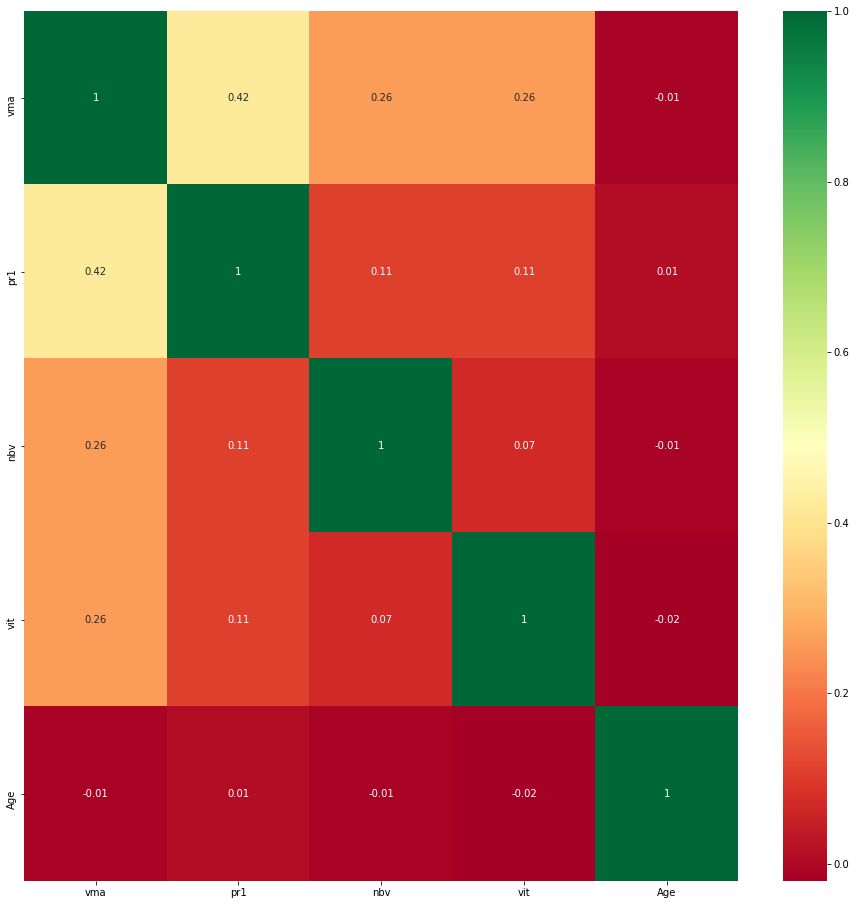

In [41]:
plt.rcParams['figure.figsize'] = 16, 16
sns.heatmap(round(based[var_quant].corr(method="kendall"),2), annot=True, cmap="RdYlGn")

Matrice de corrélation entre les variables quantitatives :

1-La corrélation entre vma et vit peut s'exprimer par le fait que les accidents se produisent à une vitesse non réglementaire.

2-La corrélation entre nbv et vma est à noter car les deux variables sont liées à la réglementation à l'autoroute.

Néanmoins, les taux de corrélation restent faibles ce qui est bien pour l'étude. Il est préférable que les variables exogènes ne soient pas corrélées entre elles.

In [42]:
# je compte étudier la variable grave en réponse, blessé contre non blessé
based1.loc[(based1.grav==1) ,'grav']=0
based1.loc[(based1.grav==2) | (based1.grav==3)| (based1.grav==4),'grav']=1

In [43]:
#je vérifiais la dispersion de la variable endogène pour ne pas avoir une réponse biaisée
len(based1.grav.loc[based1.grav==1])/len(based1.grav)*100

58.908780094021566

*******************************************************************************************************************************************

Analyse exploratrice classique

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7017B5E08>,
      dtype=object)

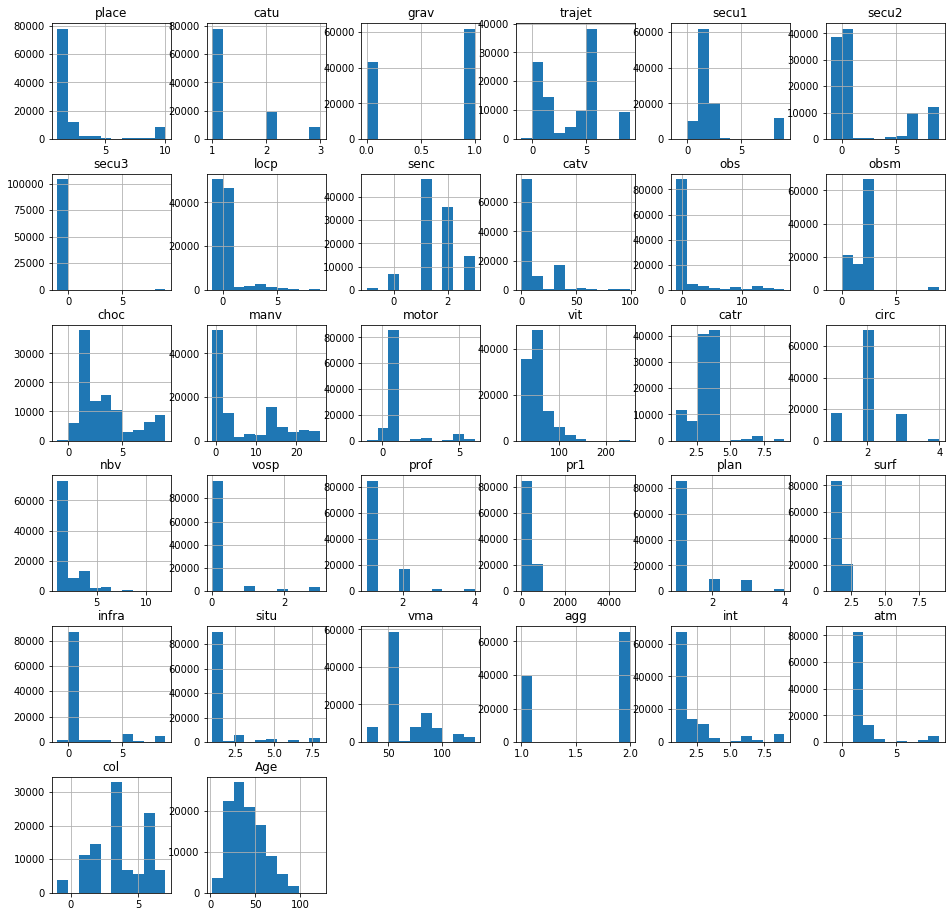

In [44]:
plt.rcParams['figure.figsize'] = 16, 16
based1.hist()

L'analyse des histograme montre une présence de beacoup de variable qualitative, la distrubtions de l'age semble cohérente .

Text(0, 0.5, 'Pourcentage des Bléssés')

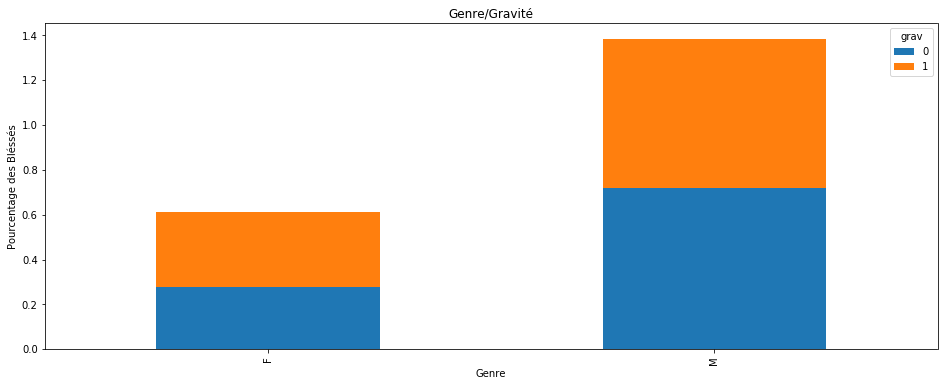

In [45]:
#distribution de la variable 'mortalite' en fonction des victimes
plt.rcParams['figure.figsize'] = 16, 6 
table = pd.crosstab(based1.sexe, based1.grav)
table.div(table.sum().astype(float),axis=1).plot(kind='bar', stacked=True)
plt.title('Genre/Gravité')
plt.xlabel('Genre')
plt.ylabel('Pourcentage des Bléssés')

#1= Male, 2=Female et 1=blessé grave ou Mort 0=blessé léger ou indemne

On constate que le pourcentage de personnes blessées du genre féminin est deux fois moins important que le pourcentage des personnes du genre masculin. Néanmoins le rapport entre blessé grave et indemne est équivalent pour les deux genres. 

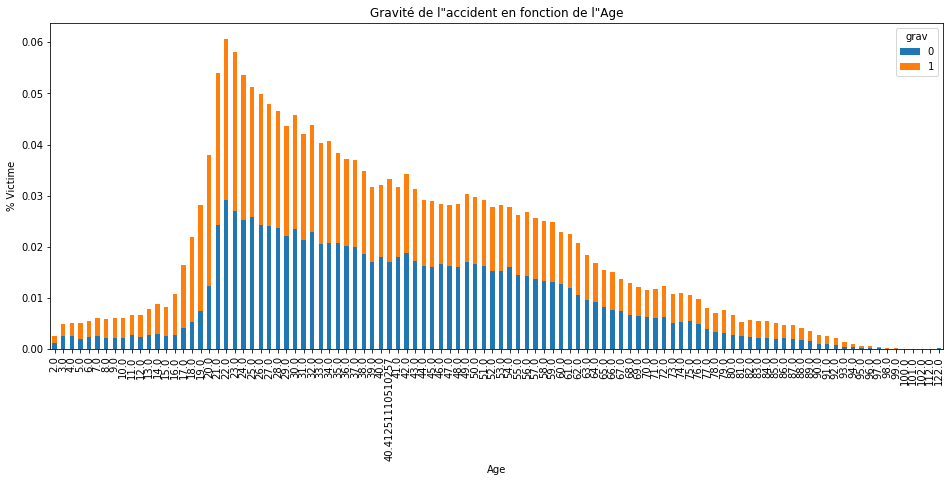

In [46]:
table = pd.crosstab(based1.Age, based1.grav)
table.div(table.sum().astype(float),axis=1).plot(kind='bar', stacked=True)
plt.title('Gravité de l"accident en fonction de l"Age')
plt.xlabel('Age')
plt.ylabel('% Victime')
plt.rcParams["figure.figsize"] = (30,10)

Le graphique montre que le pourcentage de victime d'un accident augmente fortement entre 17 et 22 ans et régrèsse doucement jusqu'à l'age de 97 ans. Il reste élevé et stable entre 38 et 61 ans avant de diminuer et être égal aux nombres de victimes ayant moins de 17 ans. 
Le nombre de blessés quand à lui est plus élevé que les indeme lors d'un accident entre 17 et 21 ans. Pour le reste des age il est inférieur ou égal  au nombre de victimes indemnes. 

Text(0, 0.5, ' Victime')

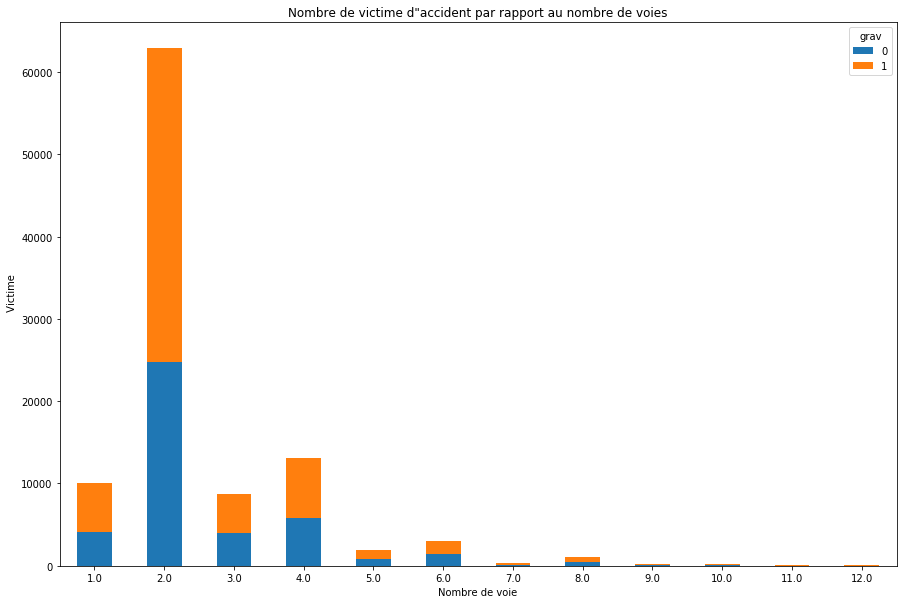

In [47]:
plt.rcParams['figure.figsize'] = 15, 10
crosstb = pd.crosstab(based1['nbv'], based1['grav'])
pl = crosstb.plot(kind="bar", stacked=True, rot=0)
plt.title('Nombre de victime d"accident par rapport au nombre de voies')
plt.xlabel('Nombre de voie')
plt.ylabel(' Victime')


Le nombre de victime croit de manière importante lorsque le nombre de voie passe à deux. 

Dès que le nombre de voies passe à 5 (autoroute) le nombre d'accident devient très faible. 

In [48]:
#Anova entre vit et grav
fvalue, pvalue = stats.f_oneway(based1['vit'], based1['grav'])
print(fvalue, pvalue)

607143.4156595828 0.0


L'anova montre que la variance de de la vitesse et non significative sur la gravité de l'accident, chose confirmer aprés le GLM.

*******************************************************************************************************************************************

Premiere Modilisation

In [49]:
Logistic_base=based1.copy()

In [50]:
Logistic_base.columns

Index(['place', 'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3',
       'locp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'vit',
       'catr', 'circ', 'nbv', 'vosp', 'prof', 'pr1', 'plan', 'surf', 'infra',
       'situ', 'vma', 'dep', 'agg', 'int', 'atm', 'col', 'Age'],
      dtype='object')

In [51]:
quali_var=['dep','place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3',
       'locp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor',
       'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra',
       'situ', 'agg', 'int', 'atm', 'col']

In [52]:
#je transforme mes variables qualitatives en str pour pouvoir appliquer get_dummies
for ele in quali_var :
    Logistic_base[ele]=Logistic_base[ele].apply(str)

In [53]:
Logistic_base= pd.get_dummies(Logistic_base)

In [54]:
Logistic_base

,grav,vit,nbv,pr1,vma,Age,place_1,place_10,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,catu_1,catu_2,catu_3,sexe_F,sexe_M,trajet_-1,trajet_0,trajet_1,trajet_2,trajet_3,trajet_4,trajet_5,trajet_9,secu1_-1,secu1_0,secu1_1,secu1_2,secu1_3,secu1_4,secu1_5,secu1_6,secu1_7,secu1_8,secu1_9,secu2_-1,secu2_0,secu2_1,secu2_2,secu2_3,secu2_4,secu2_5,secu2_6,secu2_7,secu2_8,secu2_9,secu3_-1,secu3_0,secu3_1,secu3_2,secu3_3,secu3_4,secu3_5,secu3_6,secu3_7,secu3_8,secu3_9,locp_-1,locp_0,locp_1,locp_2,locp_3,locp_4,locp_5,locp_6,locp_7,locp_8,locp_9,senc_-1,senc_0,senc_1,senc_2,senc_3,catv_0,catv_1,catv_10,catv_13,catv_14,catv_15,catv_16,catv_17,catv_2,catv_20,catv_21,catv_3,catv_30,catv_31,catv_32,catv_33,catv_34,catv_35,catv_36,catv_37,catv_38,catv_39,catv_40,catv_41,catv_42,catv_43,catv_50,catv_60,catv_7,catv_80,catv_99,obs_-1,obs_0,obs_1,obs_10,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,obs_9,obsm_-1,obsm_0,obsm_1,obsm_2,obsm_4,obsm_5,obsm_6,obsm_9,choc_-1,choc_0,choc_1,choc_2,choc_3,choc_4,choc_5,choc_6,choc_7,choc_8,choc_9,manv_-1,manv_0,manv_1,manv_10,manv_11,manv_12,manv_13,manv_14,manv_15,manv_16,manv_17,manv_18,manv_19,manv_2,manv_20,manv_21,manv_22,manv_23,manv_24,manv_25,manv_26,manv_3,manv_4,manv_5,manv_6,manv_7,manv_8,manv_9,motor_-1,motor_0,motor_1,motor_2,motor_3,motor_4,motor_5,motor_6,catr_1,catr_2,catr_3,catr_4,catr_5,catr_6,catr_7,catr_9,circ_1,circ_2,circ_3,circ_4,vosp_0,vosp_1,vosp_2,vosp_3,prof_1,prof_2,prof_3,prof_4,plan_1,plan_2,plan_3,plan_4,surf_1,surf_2,surf_3,surf_4,surf_5,surf_6,surf_7,surf_8,surf_9,infra_-1,infra_0,infra_1,infra_2,infra_3,infra_4,infra_5,infra_6,infra_7,infra_8,infra_9,situ_1,situ_2,situ_3,situ_4,situ_5,situ_6,situ_8,dep_1,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_2,dep_21,dep_22,dep_23,dep_24,dep_25,dep_26,dep_27,dep_28,dep_29,dep_2A,dep_2B,dep_3,dep_30,dep_31,dep_32,dep_33,dep_34,dep_35,dep_36,dep_37,dep_38,dep_39,dep_4,dep_40,dep_41,dep_42,dep_43,dep_44,dep_45,dep_46,dep_47,dep_48,dep_49,dep_5,dep_50,dep_51,dep_52,dep_53,dep_54,dep_55,dep_56,dep_57,dep_58,dep_59,dep_6,dep_60,dep_61,dep_62,dep_63,dep_64,dep_65,dep_66,dep_67,dep_68,dep_69,dep_7,dep_70,dep_71,dep_72,dep_73,dep_74,dep_75,dep_76,dep_77,dep_78,dep_79,dep_8,dep_80,dep_81,dep_82,dep_83,dep_84,dep_85,dep_86,dep_87,dep_88,dep_89,dep_9,dep_90,dep_91,dep_92,dep_93,dep_94,dep_95,dep_971,dep_972,dep_973,dep_974,dep_975,dep_976,dep_977,dep_978,dep_986,dep_987,dep_988,agg_1,agg_2,int_1,int_2,int_3,int_4,int_5,int_6,int_7,int_8,int_9,atm_-1,atm_1,atm_2,atm_3,atm_4,atm_5,atm_6,atm_7,atm_8,atm_9,col_-1,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,52.0,2.0,0,50.0,39.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,51.0,2.0,0,50.0,40.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [55]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 hours 55 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_ZakariaBouchegoura_rwsmei
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.117 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [56]:
log_h2o_base = h2o.H2OFrame(Logistic_base)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
train, test = log_h2o_base.split_frame(ratios=[0.80])

In [58]:
log_var=Logistic_base.loc[:, (Logistic_base.columns != "grav")].columns.tolist()

In [59]:
y='grav'
x=log_var

In [60]:
fam = "binomial"
lien = "logit"
mod = GLMH20(family = fam,link = lien, compute_p_values =True,lambda_ = 0,standardize = True,remove_collinear_columns = True)
mod.train(y = y, x = x, training_frame = train)
mod

C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [secu3_3]
  warnings.warn(mesg["message"], RuntimeWarning)
C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1648721436760_36


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,368,339,6,py_2_sid_afb9




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1331319816409402
RMSE: 0.36487255534082064
LogLoss: 0.41590313082173685
Null degrees of freedom: 84060
Residual degrees of freedom: 83721
Null deviance: 113872.84851407158
Residual deviance: 69922.46616001205
AIC: 70602.46616001205
AUC: 0.8871056241604599
AUCPR: 0.912612753608285
Gini: 0.7742112483209198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4066940251683273: 


,,0,1,Error,Rate
0,0,23319.0,11254.0,0.3255,(11254.0/34573.0)
1,1,5571.0,43917.0,0.1126,(5571.0/49488.0)
2,Total,28890.0,55171.0,0.2002,(16825.0/84061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.406694,0.839240,242.0
1,max f2,0.220833,0.902182,316.0
2,max f0point5,0.642244,0.856415,151.0
3,max accuracy,0.480623,0.806272,212.0
4,max precision,0.978796,0.973309,13.0
5,max recall,0.003870,1.000000,399.0
6,max specificity,0.999034,0.999277,0.0
7,max absolute_mcc,0.556800,0.604710,182.0
8,max min_per_class_accuracy,0.522236,0.804558,195.0
9,max mean_per_class_accuracy,0.573087,0.806919,176.0



Gains/Lift Table: Avg response rate: 58,87 %, avg score: 17,74 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.450539,1.345157,1.345157,0.791914,1.004168,0.791914,1.004168,0.013458,0.013458,34.515671,34.515671,0.008396
1,2,0.020009,0.372170,1.351216,1.348186,0.795482,0.399641,0.793698,0.701905,0.013518,0.026976,35.121598,34.818634,0.016940
2,3,0.030002,0.337783,1.379113,1.358487,0.811905,0.353334,0.799762,0.585807,0.013781,0.040757,37.911264,35.848693,0.026151
3,4,0.040007,0.319446,1.324959,1.350102,0.780024,0.327551,0.794826,0.521223,0.013256,0.054013,32.495916,35.010250,0.034055
4,5,0.050011,0.304928,1.236090,1.327295,0.727705,0.311997,0.781399,0.479368,0.012367,0.066380,23.608995,32.729456,0.039798
5,6,0.100011,0.258118,1.234657,1.280982,0.726862,0.277990,0.754133,0.378691,0.061732,0.128112,23.465743,28.098151,0.068325
6,7,0.150010,0.233189,1.275476,1.279146,0.750892,0.244848,0.753053,0.334080,0.063773,0.191885,27.547589,27.914645,0.101815
7,8,0.200010,0.215602,1.254460,1.272975,0.738520,0.223876,0.749420,0.306531,0.062722,0.254607,25.446045,27.297531,0.132749
8,9,0.300008,0.191005,1.176259,1.240738,0.692482,0.202621,0.730441,0.271896,0.117624,0.372232,17.625874,24.073773,0.175604
9,10,0.400007,0.172394,1.093207,1.203856,0.643588,0.181444,0.708729,0.249284,0.109319,0.481551,9.320731,20.385623,0.198266




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-31 22:06:24,0.000 sec,0,56936.424257,0.677323,,,,,,,
1,,2022-03-31 22:06:24,0.210 sec,1,37592.986276,0.447211,,,,,,,
2,,2022-03-31 22:06:24,0.314 sec,2,35300.985570,0.419945,,,,,,,
3,,2022-03-31 22:06:24,0.454 sec,3,34979.549150,0.416121,,,,,,,
4,,2022-03-31 22:06:24,0.565 sec,4,34961.552626,0.415907,,,,,,,
5,,2022-03-31 22:06:24,0.671 sec,5,34961.258746,0.415903,,,,,,,
6,,2022-03-31 22:06:25,0.787 sec,6,34961.233080,0.415903,0.364873,0.415903,0.450162,0.887106,0.912613,1.345157,0.200152



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,place_10,1.456978,1.000000,0.058874
1,obsm_1,1.019036,0.699417,0.041177
2,obsm_2,0.761258,0.522491,0.030761
3,catv_1,0.691989,0.474948,0.027962
4,col_3,0.665391,0.456692,0.026887
5,catv_33,0.527900,0.362325,0.021331
6,obsm_0,0.518531,0.355895,0.020953
7,col_2,0.507971,0.348647,0.020526
8,col_4,0.444303,0.304948,0.017953
9,obs_0,0.431341,0.296052,0.017430



See the whole table with table.as_data_frame()


In [61]:
#création de la table de coefficient en pandas Dataframe
coeff_table = mod._model_json['output']['coefficients_table']
coef_logistic=coeff_table.as_data_frame()


In [62]:
#la liste des variables non-signficative étonnamment vit fait partie de ces variables.
coef_logistic.loc[coef_logistic.p_value>0.05]

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,0.451709,0.683049,0.661312,0.508412,0.711775
1,vit,0.000233,0.000442,0.527936,0.597544,0.005234
2,nbv,0.017278,0.008851,1.952035,0.050934,0.023621
6,place_1,0.707491,0.438591,1.613099,0.106723,0.309624
13,place_7,0.226912,0.116275,1.951508,0.050997,0.021729
...,...,...,...,...,...,...
355,atm_4,-0.037402,0.254252,-0.147106,0.883048,-0.002105
356,atm_5,0.214045,0.203298,1.052867,0.292402,0.015532
358,atm_7,-0.264305,0.176738,-1.495464,0.134793,-0.035275
359,atm_8,-0.123790,0.164666,-0.751762,0.452194,-0.023809


Le fait de corriger vit avec la médiane 18000 valeurs manquantes à créer un biais... ce n'est pas logique que la vitesse ne détermine pas la gravité de l'accident

In [63]:
Nsign_var=coef_logistic.loc[coef_logistic.p_value>0.05].names.values.tolist()

*******************************************************************************************************************************************

deuxieme tentative

In [64]:
Logistic_base1=Logistic_base.drop(Nsign_var[1:],axis=1) # Nsign_var[1:] car Intercept n'est pas significative est il n'est pas dans le dataset

In [65]:
Logistic_base1

,grav,pr1,vma,Age,place_10,place_2,place_3,place_4,place_5,place_6,place_8,place_9,catu_2,catu_3,sexe_F,sexe_M,trajet_-1,trajet_1,trajet_5,trajet_9,secu1_0,secu1_2,secu1_9,secu2_-1,secu2_1,secu2_3,secu2_4,secu2_8,secu2_9,secu3_-1,secu3_0,secu3_1,secu3_3,secu3_9,locp_-1,locp_0,locp_2,locp_3,locp_4,locp_5,locp_7,locp_9,senc_0,senc_3,catv_0,catv_1,catv_10,catv_13,catv_14,catv_15,catv_16,catv_17,catv_2,catv_21,catv_30,catv_31,catv_32,catv_33,catv_34,catv_35,catv_37,catv_38,catv_39,catv_42,catv_43,catv_50,catv_60,catv_7,catv_80,catv_99,obs_0,obs_12,obs_13,obs_14,obs_3,obs_9,obsm_-1,obsm_0,obsm_1,obsm_2,obsm_4,obsm_5,obsm_6,obsm_9,choc_-1,choc_0,choc_1,choc_2,choc_3,choc_4,choc_5,choc_6,choc_7,choc_8,choc_9,manv_0,manv_1,manv_10,manv_13,manv_14,manv_15,manv_17,manv_18,manv_19,manv_2,manv_21,manv_22,manv_23,manv_24,manv_26,manv_3,manv_5,manv_6,manv_7,manv_8,manv_9,motor_1,motor_2,motor_6,catr_2,catr_3,catr_9,circ_4,vosp_1,vosp_2,vosp_3,prof_4,plan_4,surf_1,surf_2,surf_9,infra_-1,infra_6,infra_9,situ_5,situ_8,dep_1,dep_13,dep_23,dep_30,dep_53,dep_55,dep_60,dep_74,dep_75,dep_86,dep_9,dep_92,dep_974,dep_976,dep_988,agg_1,agg_2,int_1,int_6,int_9,atm_6,atm_9,col_-1,col_1,col_2,col_3,col_4,col_5,col_7
0,0,0,50.0,39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,50.0,40.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,100,50.0,55.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,100,50.0,25.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,50.0,37.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105290,1,650,50.0,11.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
105291,1,650,50.0,41.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,

In [66]:
log1_h2o_base = h2o.H2OFrame(Logistic_base1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
log1_var=Logistic_base1.loc[:, (Logistic_base1.columns != "grav")].columns.tolist()

In [68]:
y='grav'
x=log1_var

In [69]:
fam = "binomial"
lien = "logit"
mod1 = GLMH20(family = fam,link = lien, compute_p_values =True,lambda_ = 0,standardize = False,remove_collinear_columns = True)
mod1.train(y = y, x = x, training_frame = train)
mod1

C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [secu3_3]
  warnings.warn(mesg["message"], RuntimeWarning)
C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1648721436760_38


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,163,158,6,py_2_sid_afb9




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13406492951333077
RMSE: 0.36614878057059097
LogLoss: 0.4184856600375448
Null degrees of freedom: 84060
Residual degrees of freedom: 83902
Null deviance: 113872.84851407158
Residual deviance: 70356.6461368321
AIC: 70674.6461368321
AUC: 0.8856699998140913
AUCPR: 0.9116237435862592
Gini: 0.7713399996281827

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4163063873083417: 


,,0,1,Error,Rate
0,0,23620.0,10953.0,0.3168,(10953.0/34573.0)
1,1,5897.0,43591.0,0.1192,(5897.0/49488.0)
2,Total,29517.0,54544.0,0.2004,(16850.0/84061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.416306,0.838031,241.0
1,max f2,0.214775,0.901695,322.0
2,max f0point5,0.675168,0.855349,143.0
3,max accuracy,0.485376,0.805249,212.0
4,max precision,0.981752,0.973048,12.0
5,max recall,0.003564,1.000000,399.0
6,max specificity,0.999130,0.999306,0.0
7,max absolute_mcc,0.548826,0.601633,187.0
8,max min_per_class_accuracy,0.522286,0.802578,197.0
9,max mean_per_class_accuracy,0.563381,0.805399,181.0



Gains/Lift Table: Avg response rate: 58,87 %, avg score: 12,10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.348759,1.353236,1.353236,0.796671,0.482722,0.796671,0.482722,0.013539,0.013539,35.323573,35.323573,0.008593
1,2,0.020009,0.291108,1.363335,1.358285,0.802616,0.311924,0.799643,0.397323,0.013640,0.027178,36.333450,35.828512,0.017431
2,3,0.030002,0.263688,1.231495,1.316055,0.725000,0.275321,0.774782,0.356688,0.012306,0.039484,23.149501,31.605526,0.023055
3,4,0.040007,0.246478,1.375453,1.330909,0.809750,0.254318,0.783527,0.331088,0.013761,0.053245,37.545303,33.090912,0.032188
4,5,0.050011,0.236667,1.427967,1.350325,0.840666,0.241440,0.794957,0.313154,0.014286,0.067532,42.796666,35.032525,0.042599
5,6,0.100011,0.193542,1.263352,1.306844,0.743754,0.211739,0.769359,0.262452,0.063167,0.130698,26.335160,30.684359,0.074614
6,7,0.150010,0.176459,1.373279,1.328987,0.808470,0.184190,0.782395,0.236367,0.068663,0.199361,37.327854,32.898682,0.119993
7,8,0.200010,0.161588,1.295279,1.320560,0.762551,0.168773,0.777434,0.219470,0.064763,0.264125,29.527891,32.056034,0.155890
8,9,0.300008,0.134963,1.107959,1.249696,0.652272,0.146841,0.735715,0.195261,0.110795,0.374919,10.795854,24.969589,0.182139
9,10,0.400007,0.118745,1.051176,1.200067,0.618844,0.126601,0.706498,0.178097,0.105116,0.480036,5.117642,20.006750,0.194582




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-31 22:06:49,0.000 sec,0,56936.424257,0.677323,,,,,,,
1,,2022-03-31 22:06:49,0.071 sec,1,37833.152971,0.450068,,,,,,,
2,,2022-03-31 22:06:49,0.111 sec,2,35516.061635,0.422503,,,,,,,
3,,2022-03-31 22:06:49,0.143 sec,3,35196.016208,0.418696,,,,,,,
4,,2022-03-31 22:06:49,0.174 sec,4,35178.548909,0.418488,,,,,,,
5,,2022-03-31 22:06:49,0.206 sec,5,35178.323277,0.418486,,,,,,,
6,,2022-03-31 22:06:49,0.240 sec,6,35178.323068,0.418486,0.366149,0.418486,0.446309,0.88567,0.911624,1.353236,0.20045



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,place_10,1.443732,1.000000,0.068255
1,obsm_1,1.033877,0.716114,0.048878
2,obsm_2,0.765304,0.530087,0.036181
3,catv_1,0.724435,0.501779,0.034249
4,col_3,0.667883,0.462609,0.031575
5,locp_-1,0.586267,0.406077,0.027717
6,locp_0,0.572784,0.396739,0.027079
7,catv_33,0.524741,0.363462,0.024808
8,obsm_0,0.518477,0.359123,0.024512
9,col_2,0.511764,0.354473,0.024195



See the whole table with table.as_data_frame()


In [70]:
coeff_table1 = mod1._model_json['output']['coefficients_table']
coef_logistic1=coeff_table1.as_data_frame()

In [71]:
coef_logistic1.loc[coef_logistic1.p_value>0.05]

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,1.184604,0.625783,1.892996,0.058358,0.713218
8,place_5,0.098797,0.140666,0.702349,0.482462,0.007097
9,place_6,0.285735,0.239918,1.190969,0.233666,0.010188
12,catu_2,0.148715,0.084380,1.762442,0.077995,0.057005
19,trajet_9,-0.016557,0.035905,-0.461147,0.644693,-0.004748
22,secu1_9,-0.019978,0.299165,-0.066779,0.946758,-0.000657
28,secu2_9,0.226515,0.175338,1.291872,0.196402,0.012530
29,secu3_-1,0.025326,0.498891,0.050765,0.959513,0.002596
30,secu3_0,0.438052,0.538724,0.813128,0.416145,0.019966
31,secu3_1,2.325842,1.195548,1.945419,0.051725,0.019649


In [72]:
Nsign1_var=coef_logistic1.loc[coef_logistic1.p_value>0.05].names.values.tolist()

*******************************************************************************************************************************************

3eme modelisation

In [73]:
Logistic_base2=Logistic_base1.drop(Nsign1_var[1:],axis=1) # Nsign_var[1:] car Intercept n'est pas significative est il n'est pas dans le dataset

In [74]:
Logistic_base2

,grav,pr1,vma,Age,place_10,place_2,place_3,place_4,place_8,place_9,catu_3,sexe_F,sexe_M,trajet_-1,trajet_1,trajet_5,secu1_0,secu1_2,secu2_-1,secu2_1,secu2_3,secu2_4,secu2_8,secu3_3,locp_-1,locp_0,locp_2,locp_3,locp_4,locp_5,locp_7,senc_0,catv_0,catv_1,catv_10,catv_13,catv_14,catv_15,catv_16,catv_17,catv_2,catv_21,catv_30,catv_31,catv_32,catv_33,catv_34,catv_35,catv_37,catv_38,catv_39,catv_42,catv_43,catv_50,catv_60,catv_7,catv_80,obs_0,obs_12,obs_13,obs_14,obs_3,obsm_-1,obsm_0,obsm_1,obsm_2,obsm_4,obsm_5,obsm_6,obsm_9,choc_-1,choc_0,choc_1,choc_2,choc_3,choc_4,choc_5,choc_6,choc_7,choc_8,choc_9,manv_0,manv_1,manv_10,manv_13,manv_14,manv_15,manv_17,manv_18,manv_19,manv_2,manv_21,manv_22,manv_23,manv_24,manv_26,manv_3,manv_5,manv_6,manv_7,manv_8,motor_1,motor_2,catr_2,catr_3,vosp_1,vosp_2,surf_2,infra_-1,infra_6,situ_5,dep_1,dep_13,dep_23,dep_30,dep_53,dep_55,dep_60,dep_74,dep_75,dep_86,dep_9,dep_92,dep_974,dep_976,agg_1,agg_2,int_1,int_6,atm_6,col_-1,col_1,col_2,col_3,col_4,col_5
0,0,0,50.0,39.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,50.0,40.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,100,50.0,55.0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,100,50.0,25.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,50.0,37.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105290,1,650,50.0,11.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
105291,1,650,50.0,41.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
105292,1,650,50.0,24.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
105293,0,1,30.0,55.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [75]:
log2_h2o_base = h2o.H2OFrame(Logistic_base2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
log2_var=Logistic_base2.loc[:, (Logistic_base2.columns != "grav")].columns.tolist()

In [77]:
y='grav'
x=log2_var

In [78]:
fam = "binomial"
lien = "logit"
mod2 = GLMH20(family = fam,link = lien, compute_p_values =True,lambda_ = 0,standardize = False,remove_collinear_columns = True)
mod2.train(y = y, x = x, training_frame = train)
mod2

C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [secu3_3]
  warnings.warn(mesg["message"], RuntimeWarning)
C:\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1648721436760_40


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,134,129,6,py_2_sid_afb9




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13414624485727378
RMSE: 0.3662598051346527
LogLoss: 0.418775117963094
Null degrees of freedom: 84060
Residual degrees of freedom: 83931
Null deviance: 113872.84851407158
Residual deviance: 70405.3103821913
AIC: 70665.3103821913
AUC: 0.88553784856371
AUCPR: 0.9115748829204402
Gini: 0.77107569712742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41787051857970303: 


,,0,1,Error,Rate
0,0,23705.0,10868.0,0.3143,(10868.0/34573.0)
1,1,5963.0,43525.0,0.1205,(5963.0/49488.0)
2,Total,29668.0,54393.0,0.2002,(16831.0/84061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.417871,0.837978,235.0
1,max f2,0.217795,0.901512,318.0
2,max f0point5,0.665327,0.855553,145.0
3,max accuracy,0.473178,0.805344,213.0
4,max precision,0.982719,0.972933,12.0
5,max recall,0.003631,1.000000,399.0
6,max specificity,0.999102,0.999306,0.0
7,max absolute_mcc,0.514192,0.601048,198.0
8,max min_per_class_accuracy,0.519881,0.802302,196.0
9,max mean_per_class_accuracy,0.559702,0.804906,182.0



Gains/Lift Table: Avg response rate: 58,87 %, avg score: 11,01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010005,0.321954,1.377473,1.377473,0.810939,0.453184,0.810939,0.453184,0.013781,0.013781,37.747279,37.747279,0.009182
1,2,0.020009,0.273244,1.139142,1.258307,0.670630,0.293889,0.740785,0.373537,0.011397,0.025178,13.914172,25.830725,0.012567
2,3,0.030002,0.245338,1.379113,1.298544,0.811905,0.256649,0.764473,0.334605,0.013781,0.038959,37.911264,29.854378,0.021778
3,4,0.040007,0.232965,1.466342,1.340506,0.863258,0.239960,0.789176,0.310937,0.014670,0.053629,46.634200,34.050581,0.033122
4,5,0.050011,0.216734,1.240129,1.320426,0.730083,0.224080,0.777355,0.293561,0.012407,0.066036,24.012946,32.042576,0.038963
5,6,0.100011,0.179532,1.309828,1.315128,0.771116,0.193407,0.774236,0.243490,0.065491,0.131527,30.982806,31.512754,0.076629
6,7,0.150010,0.161356,1.351455,1.327236,0.795622,0.170260,0.781364,0.219082,0.067572,0.199099,35.145481,32.723567,0.119354
7,8,0.200010,0.142926,1.242336,1.306012,0.731382,0.151146,0.768869,0.202099,0.062116,0.261215,24.233615,30.601205,0.148815
8,9,0.300008,0.122079,1.085933,1.232655,0.639305,0.131841,0.725683,0.178680,0.108592,0.369807,8.593274,23.265519,0.169708
9,10,0.400007,0.106645,1.158072,1.214010,0.681775,0.113934,0.714706,0.162494,0.115806,0.485613,15.807230,21.401002,0.208142




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-31 22:07:13,0.000 sec,0,56936.424257,0.677323,,,,,,,
1,,2022-03-31 22:07:13,0.063 sec,1,37856.871341,0.450350,,,,,,,
2,,2022-03-31 22:07:13,0.095 sec,2,35539.268850,0.422780,,,,,,,
3,,2022-03-31 22:07:13,0.123 sec,3,35220.193750,0.418984,,,,,,,
4,,2022-03-31 22:07:13,0.164 sec,4,35202.879431,0.418778,,,,,,,
5,,2022-03-31 22:07:13,0.191 sec,5,35202.655400,0.418775,,,,,,,
6,,2022-03-31 22:07:13,0.217 sec,6,35202.655191,0.418775,0.36626,0.418775,0.445973,0.885538,0.911575,1.377473,0.200224



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,place_10,1.437479,1.000000,0.069515
1,obsm_1,1.034950,0.719975,0.050049
2,obsm_2,0.765070,0.532230,0.036998
3,catv_1,0.726824,0.505624,0.035148
4,col_3,0.670702,0.466582,0.032434
5,locp_-1,0.542468,0.377374,0.026233
6,locp_0,0.532241,0.370260,0.025738
7,catv_33,0.523678,0.364303,0.025324
8,obsm_0,0.517685,0.360134,0.025035
9,col_2,0.514892,0.358191,0.024899



See the whole table with table.as_data_frame()


In [79]:
coeff_table2 = mod2._model_json['output']['coefficients_table']
coef_logistic2=coeff_table2.as_data_frame()

In [80]:
coef_logistic1.loc[coef_logistic1.p_value>0.05]

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,1.184604,0.625783,1.892996,0.058358,0.713218
8,place_5,0.098797,0.140666,0.702349,0.482462,0.007097
9,place_6,0.285735,0.239918,1.190969,0.233666,0.010188
12,catu_2,0.148715,0.084380,1.762442,0.077995,0.057005
19,trajet_9,-0.016557,0.035905,-0.461147,0.644693,-0.004748
22,secu1_9,-0.019978,0.299165,-0.066779,0.946758,-0.000657
28,secu2_9,0.226515,0.175338,1.291872,0.196402,0.012530
29,secu3_-1,0.025326,0.498891,0.050765,0.959513,0.002596
30,secu3_0,0.438052,0.538724,0.813128,0.416145,0.019966
31,secu3_1,2.325842,1.195548,1.945419,0.051725,0.019649


In [81]:
positive_coef=coef_logistic2[['names','coefficients']].loc[coef_logistic2.coefficients>0]
negative_coef=coef_logistic2[['names','coefficients']].loc[coef_logistic2.coefficients<0]

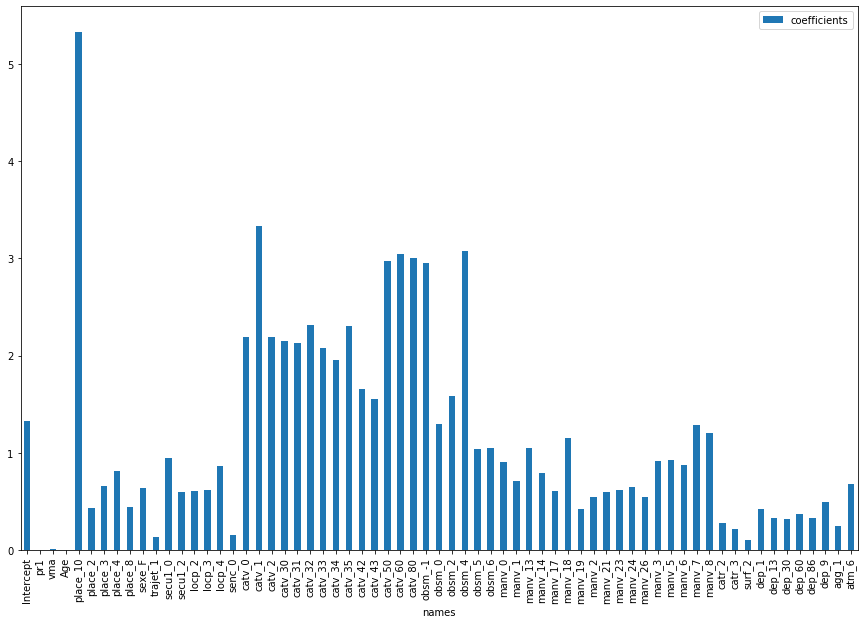

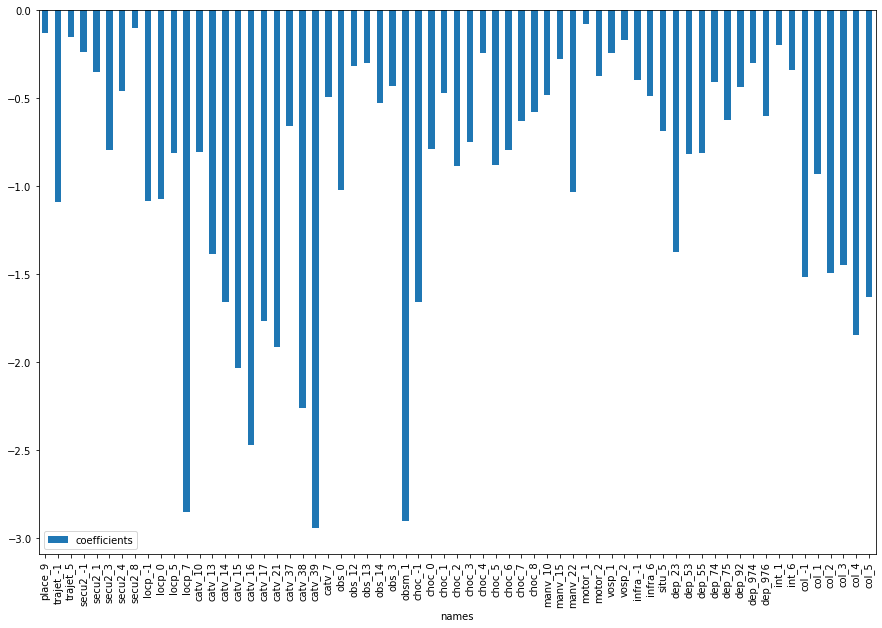

In [82]:
positive_coef.set_index('names').plot.bar()
negative_coef.set_index('names').plot.bar()

L'analyse de mes trois modeles, montre une bonne AUC de 88% mais MSE de 0.13 ce qui est éléve, mon modele est imprecis dans
ça prévision.

Je prénsente aussi le graphe ci dessous pour voir l'impacte de chaque variales et je constate le suivant,

Il y a pas un effet Age sur la grav,
Un effet leget du sexe.

Les deux variables imporatntes sont :
place_10 = Piéton ce qui est logiques la gravité est éléve, la probablité est éléves car sont beta est positive.
obsm_1 quands l'abjet heurtés est un piétons, c'est bizzare... car son beta est négative donc la probalité pour que l'accident soit grave est petite...

*******************************************************************************************************************************************

*******************************************************************************************************************************************

remarque : j'ai arrêté la modélisation du GLM ici contrainte de temps, mais il faut continuer à enlever tous coefs à p_value>0.05 et remodélisé le nombre de fois qu'il faut

*******************************************************************************************************************************************

*******************************************************************************************************************************************

J'ai réalisé ci-dessous une table croisée entre obsm et grav et je soupçon rien d'incohérent.

Mais le Coéficient de obsm_1 n'est pas logique

In [83]:
base.obsm.value_counts(dropna=False)

 2    66718
 0    20964
 1    15684
 9     1538
 6      143
 4      115
 5       85
-1       48
Name: obsm, dtype: int64

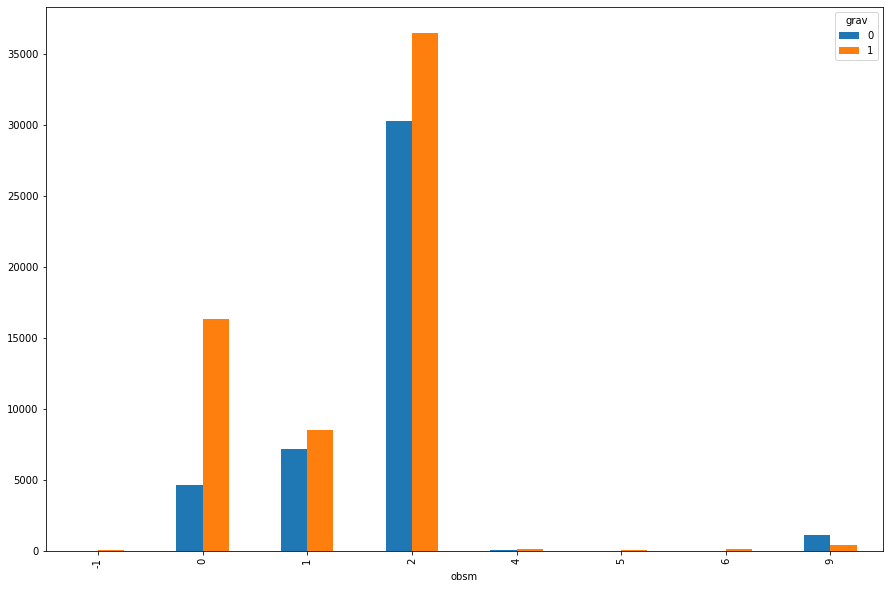

In [84]:
pd.crosstab(base.obsm,based1.grav).plot.bar()

In [85]:
Logistic_base2.to_csv( 'R.csv',index=False)

*******************************************************************************************************************************************

Ce code est sur R je n'ai pas pu le reproduire sur python à cause la bibliothèque h2o, je ne connais pas toutes les méthodes.

Il donne le graphique sur le PDF "Probabilté de la gravité de l'accident"

library(ggplot2)
library(cowplot)

url="C:votre chemin/R.csv"

data <- read.csv(url, header=TRUE)

logistic <- glm(grav ~ ., data=data, family="binomial")
summary(logistic)

predicted.data <- data.frame(
  probability.of.grav=logistic$fitted.values,
  grav=data$grav)


predicted.data <- data.frame(
  probability.of.grav=logistic$fitted.values,
  grav=data$grav)

predicted.data <- predicted.data[
  order(predicted.data$probability.of.grav, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)


ggplot(data=predicted.data, aes(x=rank, y=probability.of.grav)) +
  geom_point(aes(color=grav), alpha=1, shape=4, stroke=2) +
  xlab("les Observations") +
  ylab("Probabilté de la gravité de l'accident")

ggsave("Probabilté de la gravité de l'accident.pdf")



*********************************************************************************************************************************

Clustering par K-Means

-Dans cette partie on a créé plusieurs data set que leur importe peu, veuillez ignorer les nominations du genre "df1" etc...

-Le but de ces merge c'est faire des tables croisées par département pour extraire le maximum d'informations quantitatives pour possible, pour mon K-Means


In [86]:
charge=base_charge.copy()

In [87]:
df1=pd.merge(charge, base_c[["dep","Num_Acc"]], on=["Num_Acc"],how="inner")
df1

,Num_Acc,PriseEnCharge,dep
0,"202 000 000 001,00",2278.68,91
1,"202 000 000 002,00",2573.46,91
2,"202 000 000 003,00",2766.99,91
3,"202 000 000 004,00",2544.67,91
4,"202 000 000 005,00",1315.94,77
...,...,...,...
29565,"202 000 029 566,00",4293.02,35
29566,"202 000 029 567,00",2385.77,17
29567,"202 000 029 568,00",2748.69,15
29568,"202 000 029 569,00",2139.68,27


In [88]:
#coût moyen par département

CM_dep=df1.pivot_table(index=['dep'],
                    columns=[],
                    values=['PriseEnCharge'],
                    aggfunc=np.mean)
CM_dep

,PriseEnCharge
dep,
1,2313.747552
10,2403.189255
11,2343.608278
12,2113.490000
13,2454.464244
...,...
977,2420.328333
978,2669.761739
986,2961.558333


In [89]:
#coût Total par département

CT_dep=df1.pivot_table(index=['dep'],
                    columns=[],
                    values=['PriseEnCharge'],
                    aggfunc=np.sum)
CT_dep 

,PriseEnCharge
dep,
1,557613.16
10,451799.58
11,421849.49
12,194441.08
13,3441158.87
...,...
977,14521.97
978,61404.52
986,17769.35


In [90]:
#Nombre d'accident par département
NA_dep=df1.pivot_table(index=['dep'],
                    columns=[],
                    values=['PriseEnCharge'],
                    aggfunc=np.size)
NA_dep 

,PriseEnCharge
dep,
1,241
10,188
11,180
12,92
13,1402
...,...
977,6
978,23
986,6


In [91]:
#Ici je compte le nombre de personnes blessées graves ou pas
df2=pd.merge(df1, base_u[["grav","Num_Acc"]], on=["Num_Acc"],how="inner")
df2.loc[(df2.grav==1),'grav']=0
df2.loc[(df2.grav==2) | (df2.grav==3) | (df2.grav==4) ,'grav']=1

In [92]:
#Je prends en considération que les blessées graves
NB_grav_dep=df2.loc[df2.grav==1].pivot_table(index=['dep'],
                    columns=[],
                    values=['PriseEnCharge'],
                    aggfunc=np.size)
NB_grav_dep 

,PriseEnCharge
dep,
1,381
10,239
11,241
12,128
13,2043
...,...
977,6
978,29
986,10


In [93]:
df3=pd.merge(df1, base_u[["an_nais","Num_Acc"]], on=["Num_Acc"],how="inner")
df3['age']=2022-df3['an_nais']
df3

,Num_Acc,PriseEnCharge,dep,an_nais,age
0,"202 000 000 001,00",2278.68,91,1983.0,39.0
1,"202 000 000 001,00",2278.68,91,1982.0,40.0
2,"202 000 000 002,00",2573.46,91,1967.0,55.0
3,"202 000 000 002,00",2573.46,91,1997.0,25.0
4,"202 000 000 003,00",2766.99,91,1985.0,37.0
...,...,...,...,...,...
64998,"202 000 029 568,00",2748.69,15,1934.0,88.0
64999,"202 000 029 568,00",2748.69,15,1938.0,84.0
65000,"202 000 029 569,00",2139.68,27,1982.0,40.0
65001,"202 000 029 570,00",2471.85,14,1988.0,34.0


In [94]:
#L'age moyen par département
AG_dep=df3.pivot_table(index=['dep'],
                    columns=[],
                    values=['age'],
                    aggfunc=np.mean)
AG_dep 

,age
dep,
1,39.000000
10,39.334951
11,42.441975
12,43.445596
13,38.638753
...,...
977,35.333333
978,36.177778
986,36.307692


In [95]:
df4=pd.merge(df1, base_l[["vma","Num_Acc"]], on=["Num_Acc"],how="inner")

In [96]:
#la moyen par département de la vitesse moyenne autorisé
vmaM_dep=df4.pivot_table(index=['dep'],
                    columns=[],
                    values=['vma'],
                    aggfunc=np.mean)
vmaM_dep 

,vma
dep,
1,69.585062
10,59.627660
11,63.722222
12,67.608696
13,61.768902
...,...
977,38.333333
978,55.217391
986,66.666667


In [97]:
df5=pd.merge(df1, base_v[["vit","Num_Acc"]], on=["Num_Acc"],how="inner")

In [98]:
#la moyen par département de la vitesse ceci donne une idée sur comment les gens roule par département
vitM_dep=df5.pivot_table(index=['dep'],
                    columns=[],
                    values=['vit'],
                    aggfunc=np.mean)
vitM_dep 

,vit
dep,
1,71.659702
10,62.675844
11,67.443274
12,69.254469
13,66.733006
...,...
977,42.690726
978,58.272703
986,64.888889


Plus les données récupérées sur les 5 bases, j'ai récupéré  de Wikipédia les données concernant la densité par département...
Désolé Monsieur Gilles j'ai utilisé Excel pour le Scrap ^^' (contrainte du temps)

In [99]:
!pip install odfpy 

In [100]:
density=pd.read_excel('dep_den.ods', engine='odf')

In [101]:
density

,dep,nom_dep,Population,Superficie,Densité
0,01,Ain,652432,5762.400000,113.222268
1,02,Aisne,531345,7361.700000,72.176943
2,03,Allier,335975,7340.100000,45.772537
3,04,Alpes-de-Haute-Provence,164308,6925.200000,23.726102
4,05,Hautes-Alpes,141220,5548.700000,25.451007
...,...,...,...,...,...
102,977,Saint-Barthélemy,25,10289.000000,0.002430
103,978,Saint-Martin,53,32489.000000,0.001631
104,986,Wallis-et-Futuna,140,11558.000000,0.012113
105,987,Polynésie française,4200,275918.000000,0.015222


In [102]:
list_pivot=[vitM_dep,vmaM_dep,AG_dep,NB_grav_dep,NA_dep,CT_dep,CM_dep]

Ici j'unifiais l'Header de ma table pivot, et aussi je convertis les départements 1..9 en 01..09 car elles sont sous ce format dans la table densités

In [103]:
for ele in list_pivot :
    utils.unif_header(ele)
    ele['dep'] = ele['dep'].astype(str)
    ele.dep=ele.dep.apply(lambda x : x if len(x)>1 else '0'+x)

In [104]:
for ele in list_pivot :
    print(ele.shape)

(107, 2)
(107, 2)
(107, 2)
(107, 2)
(107, 2)
(107, 2)
(107, 2)


Je préfère faire des inner jointure à deux, la boucle ci-dessous c'est pour faire le merge totale

In [105]:
merge=pd.DataFrame(density['dep'])
list_joint=[vitM_dep,vmaM_dep,AG_dep,NB_grav_dep,NA_dep,CT_dep,CM_dep]
while len(list_joint)!=0 :
    merge=pd.merge(merge,list_joint[0], on=["dep"],how="inner")
    list_joint.pop(0)    

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PriseEnCharge_x'} in the result is deprecated and will raise a MergeError in a future version.
  after removing the cwd from sys.path.


In [106]:
merge

,dep,vit,vma,age,PriseEnCharge_x,PriseEnCharge_y,PriseEnCharge_x,PriseEnCharge_y
0,01,71.659702,69.585062,39.000000,381,241,557613.16,2313.747552
1,02,68.380797,68.095238,41.953125,154,126,297439.86,2360.633810
2,03,72.428537,71.666667,40.163009,193,144,323533.75,2246.762153
3,04,70.916160,67.700000,42.872727,132,100,214423.70,2144.237000
4,05,66.232954,61.655172,43.334337,221,145,343562.31,2369.395241
...,...,...,...,...,...,...,...,...
102,977,42.690726,38.333333,35.333333,6,6,14521.97,2420.328333
103,978,58.272703,55.217391,36.177778,29,23,61404.52,2669.761739
104,986,64.888889,66.666667,36.307692,10,6,17769.35,2961.558333
105,987,57.455212,54.214286,40.467532,105,70,176320.80,2518.868571


In [107]:
density['dep'] = density['dep'].astype(str)

In [108]:
zonier=pd.merge(merge,density, on=["dep"],how="inner")
zonier

,dep,vit,vma,age,PriseEnCharge_x,PriseEnCharge_y,PriseEnCharge_x,PriseEnCharge_y,nom_dep,Population,Superficie,Densité
0,01,71.659702,69.585062,39.000000,381,241,557613.16,2313.747552,Ain,652432,5762.400000,113.222268
1,02,68.380797,68.095238,41.953125,154,126,297439.86,2360.633810,Aisne,531345,7361.700000,72.176943
2,03,72.428537,71.666667,40.163009,193,144,323533.75,2246.762153,Allier,335975,7340.100000,45.772537
3,04,70.916160,67.700000,42.872727,132,100,214423.70,2144.237000,Alpes-de-Haute-Provence,164308,6925.200000,23.726102
4,05,66.232954,61.655172,43.334337,221,145,343562.31,2369.395241,Hautes-Alpes,141220,5548.700000,25.451007
...,...,...,...,...,...,...,...,...,...,...,...,...
102,977,42.690726,38.333333,35.333333,6,6,14521.97,2420.328333,Saint-Barthélemy,25,10289.000000,0.002430
103,978,58.272703,55.217391,36.177778,29,23,61404.52,2669.761739,Saint-Martin,53,32489.000000,0.001631
104,986,64.888889,66.666667,36.307692,10,6,17769.35,2961.558333,Wallis-et-Futuna,140,11558.000000,0.012113
105,987,57.455212,54.214286,40.467532,105,70,176320.80,2518.868571,Polynésie française,4200,275918.000000,0.015222


In [109]:
LV=['dep','Moy_Vit', 'Moy_Vma','Moy_age','nbr_acc','nbr_acc_grav','Cout_totale','cout_moy','nom_dep','Population','Superficie','Densité']

In [110]:
zonier.columns=LV

*******************************************************************************************************************************************

Avant de faire mon zonier avec K-means je vais voir regarder qui sont les départemnt qui ont plue d'accident,
je faire une mesure à trois catégories.

In [111]:
zonier_grav500=zonier[['dep','nbr_acc']].loc[zonier.nbr_acc<=500]
zonier_grav1500=zonier[['dep','nbr_acc']].loc[(zonier.nbr_acc>500) & (zonier.nbr_acc<1500)]
zonier_grav1500_plus=zonier[['dep','nbr_acc']].loc[zonier.nbr_acc>1500]


l'Objet pygal accept que des dictionaire donc j'ai converti mon data frame en dictionaire

In [112]:
dep_grav_500=dict(zip(zonier_grav500.dep, zonier_grav500.nbr_acc))
dep_grav_1000=dict(zip(zonier_grav1500.dep, zonier_grav1500.nbr_acc))
dep_grav_1500=dict(zip(zonier_grav1500_plus.dep, zonier_grav1500_plus.nbr_acc))

pygal_show est un bout de code en java script que j'ai trouvé sur internet qui me permet d'aficher la carte interactive de pygal,
sur l'interface de jupyter.

In [113]:
fr_chart_grav = pygal.maps.fr.Departments()
fr_chart_grav.title = 'Nombre d"accidents par département'
fr_chart_grav.add('nbr<500',dep_grav_500)
fr_chart_grav.add('500 <nbr< 1500',dep_grav_1000)
fr_chart_grav.add('1500>',dep_grav_1500)
fr_chart_grav.render_to_png('grav_dep.png')
utils.pygal_show(fr_chart_grav)

*******************************************************************************************************************************************

Ici j'entame la création du Zonier à l'aide du K-Means, j'ai pris 8 le nombre de cluster.

In [114]:
#j'enlève les deux variables qualitatives
df=zonier.copy()
df.drop(['dep', 'nom_dep'], axis=1,inplace=True)

In [115]:
# je standardise mes donnée
scaler = StandardScaler()  
df= scaler.fit_transform(df)

In [116]:
from sklearn.cluster import KMeans
K = [5,8,10,15,20]
error = []
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=4, random_state=0, max_iter=100).fit(df)
    error.append(kmeans.inertia_)    

In [117]:
rcParams['figure.figsize'] = 16, 6

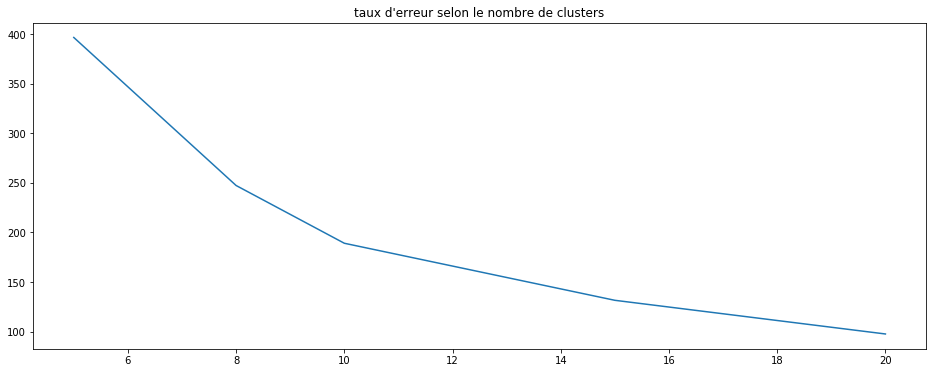

In [118]:
plt.figure
plt.plot(K, error)
plt.title("taux d'erreur selon le nombre de clusters")
plt.show()

In [119]:
#le nombre peut être modifiable au niveau de la variable global nbr_zone
nbr_zone=8
kmeans = KMeans(n_clusters=nbr_zone, n_init=4, random_state=0, max_iter=1000).fit(df)

In [120]:
KM=kmeans.labels_

In [121]:
zone=pd.DataFrame({"zone":KM,"dep":zonier.dep,"nom":zonier.nom_dep})

Dans sa globalité et avec le peu de donnée disponible je constate que mon K-Means a pu distinguer les cas extrêmes, pour une meilleure approche il faut prendre plus de données.

In [122]:
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
for i in range(nbr_zone):
    fr_chart.add('zone'+str(i), zone.loc[zone.zone==i].dep.values)
utils.pygal_show(fr_chart)

*******************************************************************************************************************************************

Un Modele de reseau de neuronne pour faire une Logistique

In [123]:
dp_based=Logistic_base2.copy()

In [124]:
dp_based.shape[1]-1

135

In [125]:
dpy=dp_based.grav
dpx=dp_based.drop(['grav'], axis=1)

In [126]:
XLearn, XTest, yLearn, yTest = train_test_split(dpx,dpy, test_size=0.33, random_state=42)

In [127]:
model_PB=keras.Sequential()
model_PB.add(keras.layers.Dense(360,input_dim=dp_based.shape[1]-1,activation='relu'))
model_PB.add(keras.layers.Dense(240,activation='relu'))
model_PB.add(keras.layers.Dense(10,activation='relu'))
model_PB.add(keras.layers.Dense(1,activation='sigmoid'))
model_PB.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics=["binary_accuracy"])

In [128]:
model_PB.fit(XLearn, yLearn, epochs=50, batch_size=32)

Epoch 1/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.7001 - binary_accuracy: 0.5899
Epoch 2/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.6771 - binary_accuracy: 0.5900
Epoch 3/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.6771 - binary_accuracy: 0.5900
Epoch 4/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.6770 - binary_accuracy: 0.5900
Epoch 5/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.6770 - binary_accuracy: 0.5900
Epoch 6/50
2205/2205 [==============================] - 6s 3ms/step - loss: 0.6770 - binary_accuracy: 0.5900
Epoch 7/50
2205/2205 [==============================] - 5s 2ms/step - loss: 0.6771 - binary_accuracy: 0.5900
Epoch 8/50
2205/2205 [==============================] - 6s 3ms/step - loss: 0.6770 - binary_accuracy: 0.5900
Epoch 9/50
2205/2205 [==============================] - 6s 3ms/step - loss: 0.6771 - binary_accuracy: 0.5900
Epoch 10/50
2205/22

Avec Ce réseau de neurones j'obtiens un maximum au AUC de 80% ça reste faible comparons le GLM surtout que la valeur de loss fonction pour les deux modèles n'est pas très optimale.

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

*******************************************************************************************************************************************

Bonne Lecture

Et

Merci beacoup ! 

pour les conseils et la conaissance. ;)

*******************************************************************************************************************************************

*******************************************************************************************************************************************